In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('Flight_Booking.csv')

In [3]:
df=df.drop(columns=['Unnamed: 0'])

In [4]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [6]:
df.shape

(300153, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# Data Visualization

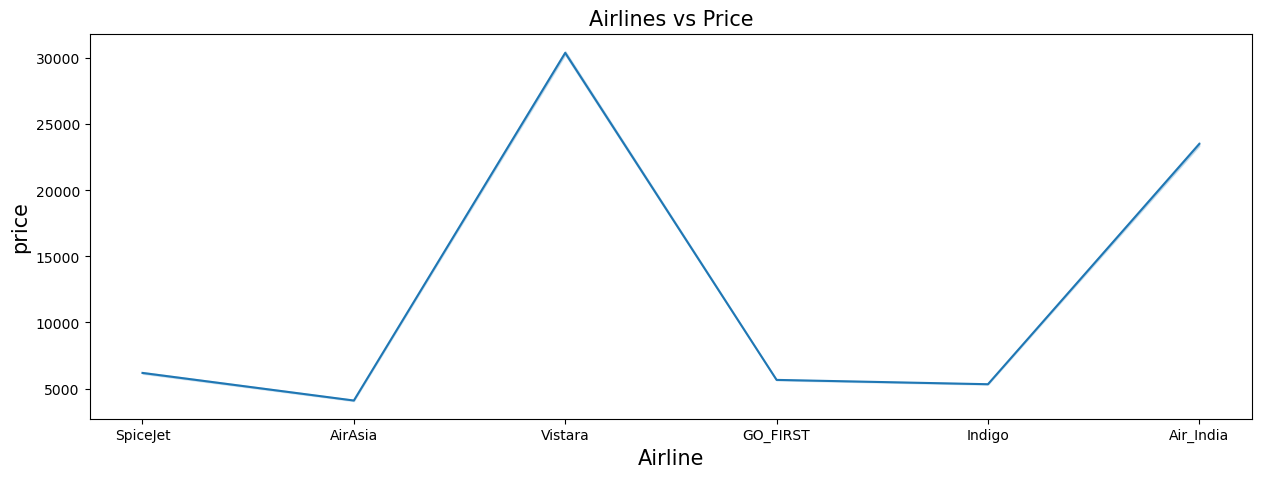

In [10]:
# There is a variation in price with different airlines

plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'], y=df['price'])
plt.title('Airlines vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('price',fontsize=15)
plt.show()

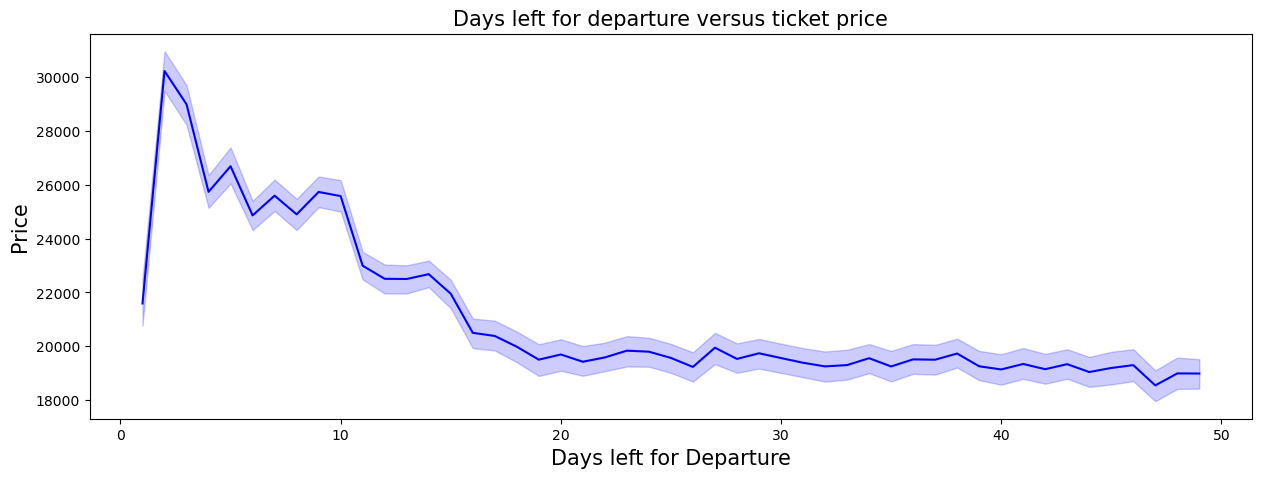

In [11]:
# The price of the ticket increases as the days left for departure decreases

plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left', y='price',color='blue')
plt.title('Days left for departure versus ticket price',fontsize=15)
plt.xlabel('Days left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

<Axes: xlabel='airline', ylabel='price'>

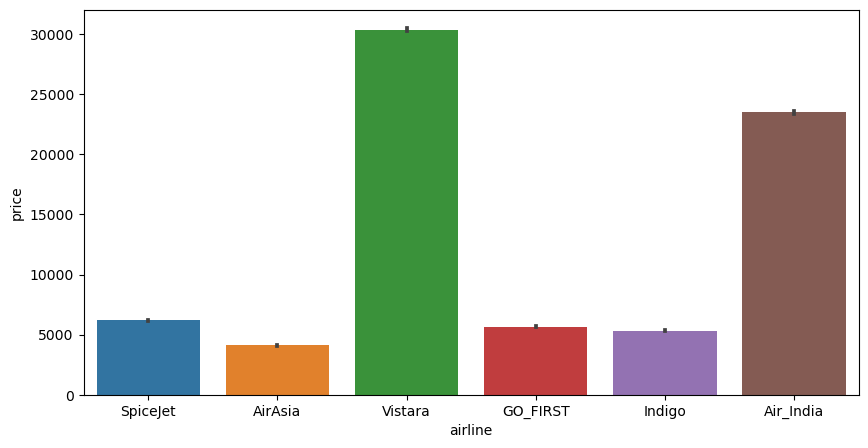

In [12]:
# Price range of all the flights

plt.figure(figsize=(10,5));
sns.barplot(x='airline',y='price',data=df)

<Axes: xlabel='class', ylabel='price'>

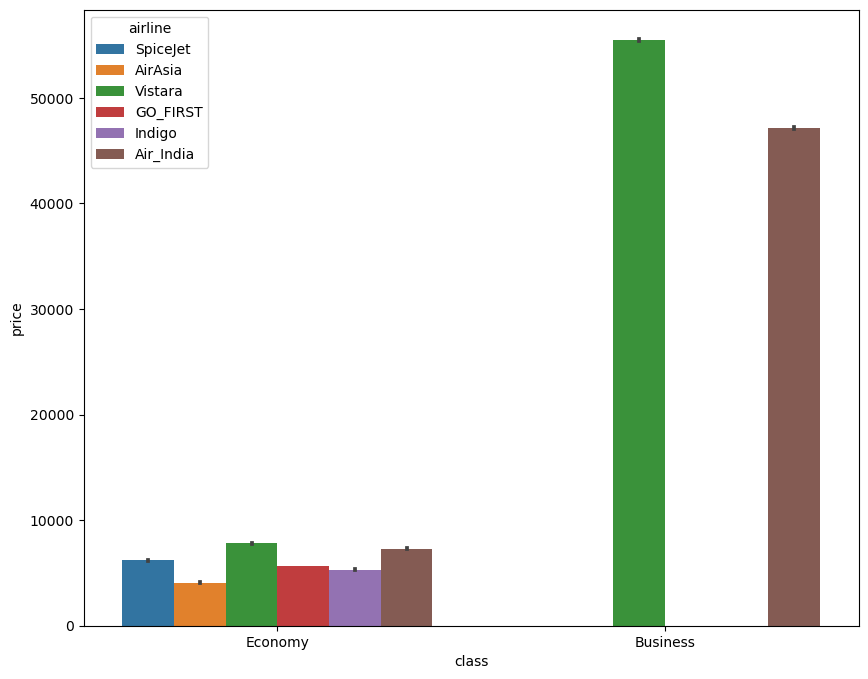

In [13]:
# Range of price of all the flights of Economy and Business class

plt.figure(figsize=(10,8));
sns.barplot(x='class',y='price', data=df, hue='airline')


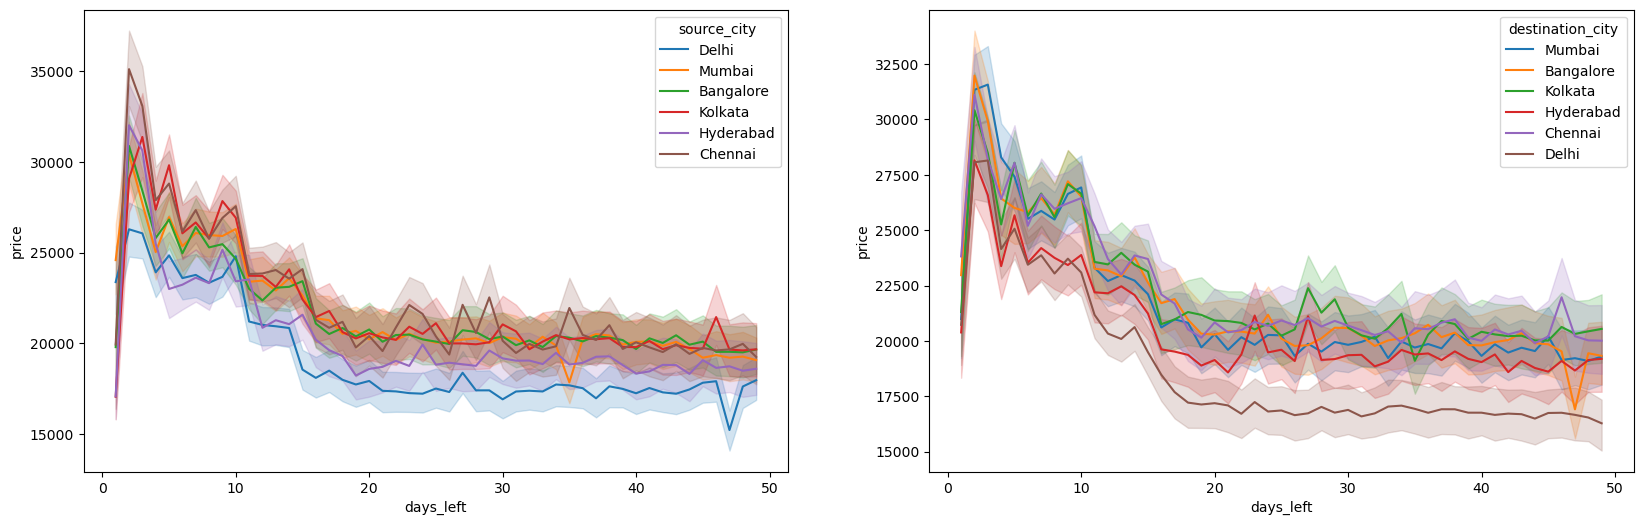

In [14]:
# Range of price of flights with source and destination city according to the days left

fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left', y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left', y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

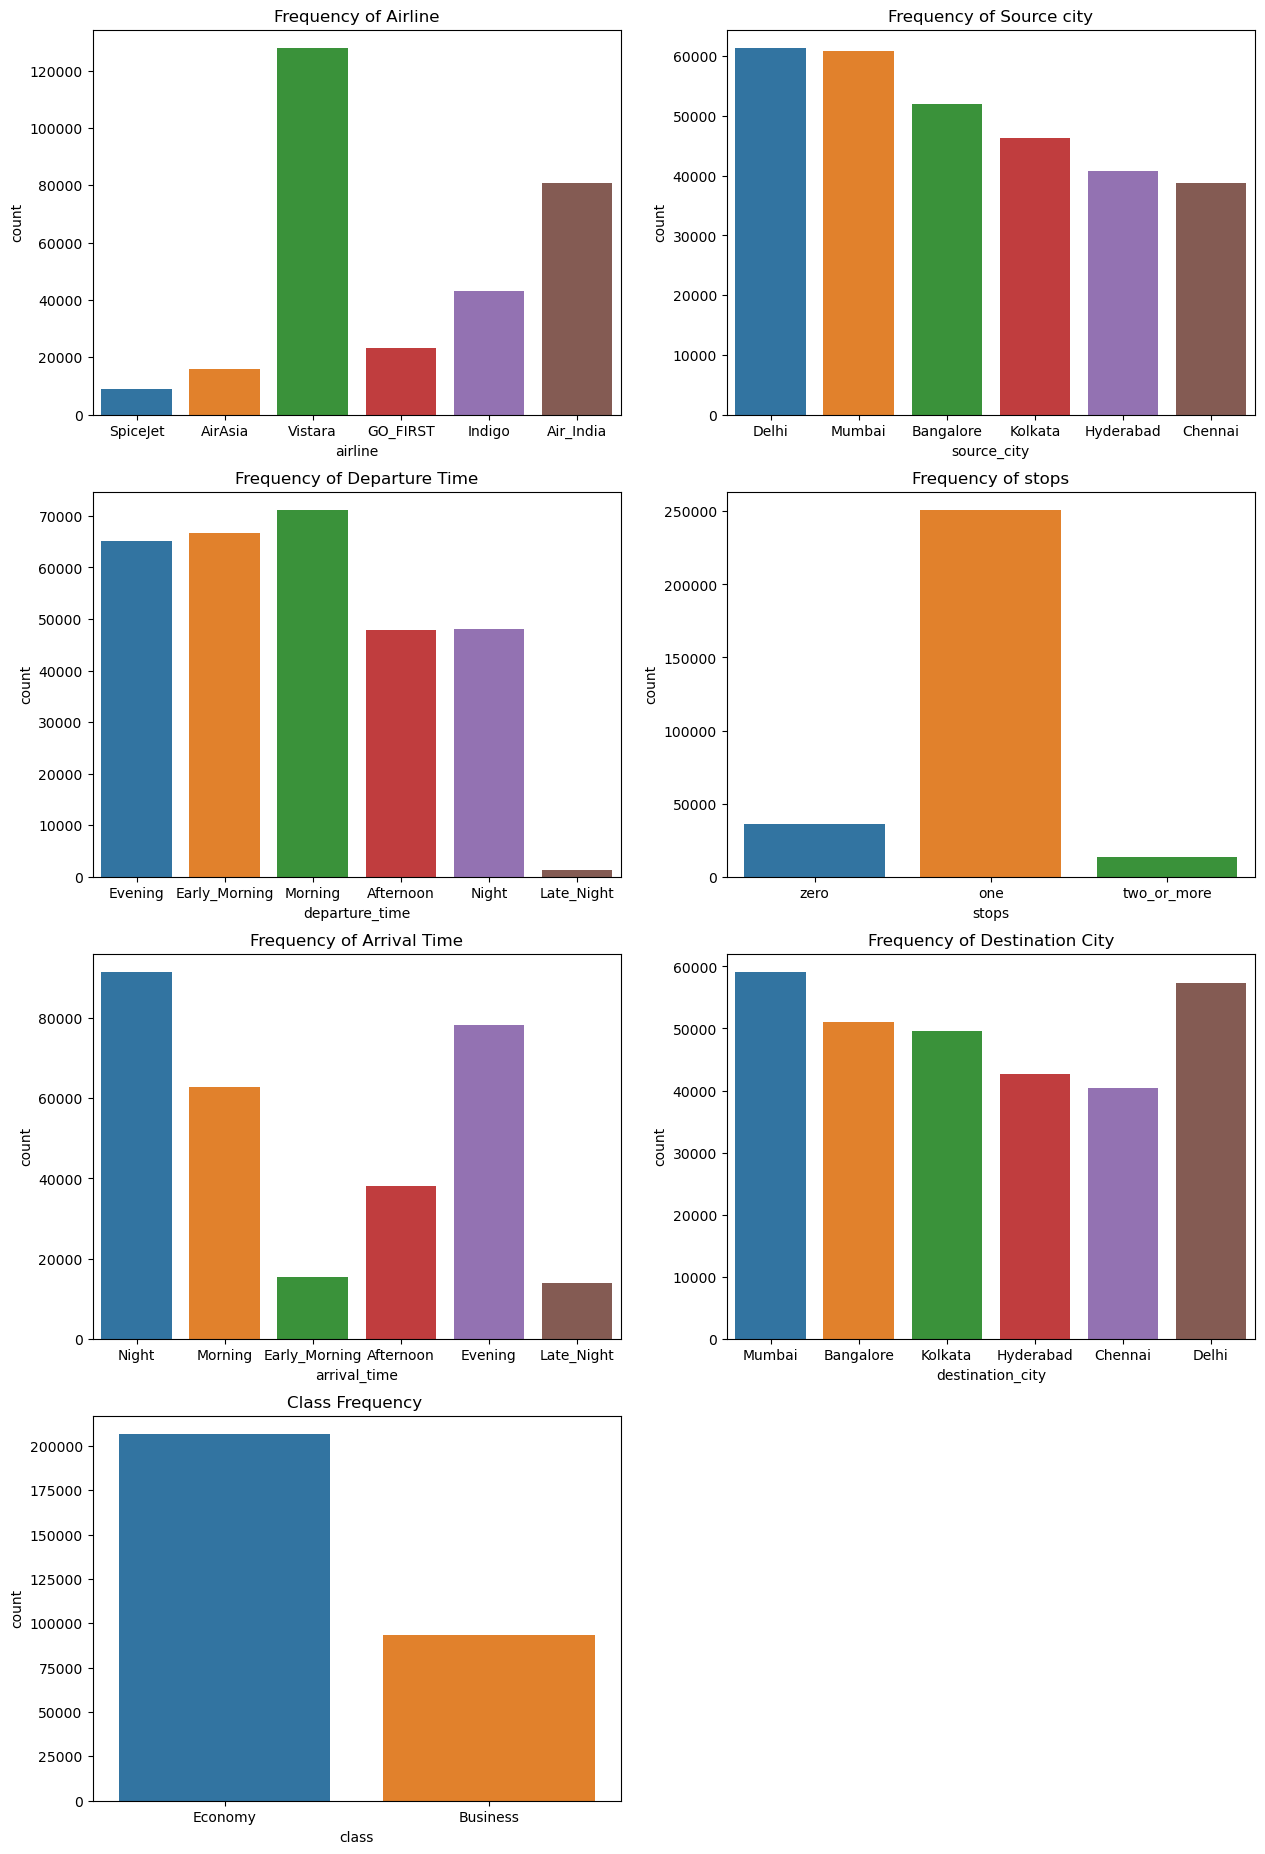

In [15]:
# Visualization of categorical features with countplot

plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'], data=df)
plt.title("Frequency of Airline")

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'], data=df)
plt.title("Frequency of Source city")

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'], data=df)
plt.title("Frequency of Departure Time")

plt.subplot(4,2,4)
sns.countplot(x=df['stops'], data=df)
plt.title("Frequency of stops")

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'], data=df)
plt.title("Frequency of Arrival Time")

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'], data=df)
plt.title("Frequency of Destination City")

plt.subplot(4,2,7)
sns.countplot(x=df['class'], data=df)
plt.title("Class Frequency ")

plt.show()

In [16]:
# Performing One Hot Encoding for categorical features of a dataframe

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['airline']=le.fit_transform(df['airline'])
df['source_city']=le.fit_transform(df['source_city'])
df['departure_time']=le.fit_transform(df['departure_time'])
df['stops']=le.fit_transform(df['stops'])
df['arrival_time']=le.fit_transform(df['arrival_time'])
df['destination_city']=le.fit_transform(df['destination_city'])
df['class']=le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


In [17]:
col1=['airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price']
df1 = df[col1]

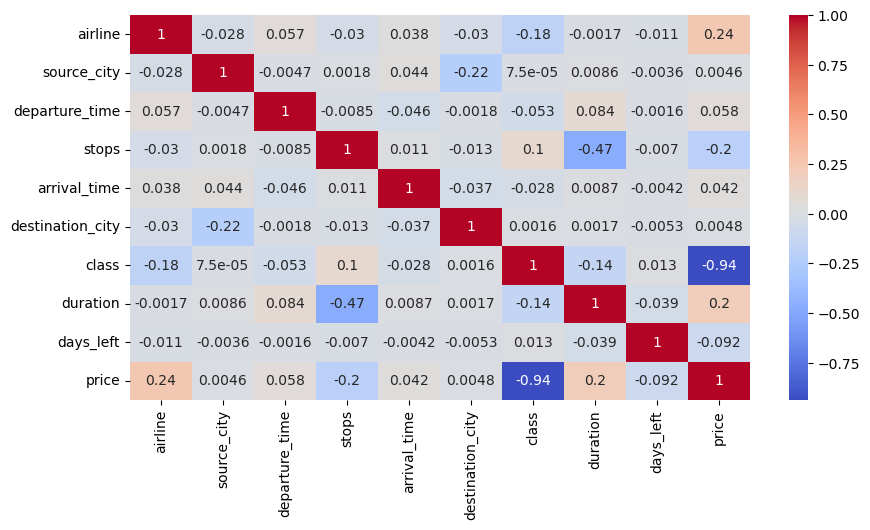

In [18]:
# Feature selection
# Plotting the correlation graph to see the correlation between features and dependent variable.

plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True,cmap="coolwarm")
plt.show()

In [19]:
# Selecting the features using VIF. VIF should be less than 5. So drop the stops feature.

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list= []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price') ):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [20]:
df1

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49,69265
300149,5,1,0,0,5,3,0,10.42,49,77105
300150,5,1,1,0,5,3,0,13.83,49,79099
300151,5,1,1,0,2,3,0,10.00,49,81585


In [21]:
# Dropping the stops column. All features are having VIF less than 5

df = df.drop(columns=['stops'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in df.columns:
    if ((df[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = df[col_list]
vif_data = pd.DataFrame()
vif_data['feature']= X.columns
vif_data['VIF'] =[variance_inflation_factor(X.values, i)
                 for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.370020
1       source_city  2.895803
2    departure_time  2.746255
3      arrival_time  3.632792
4  destination_city  2.857808
5             class  2.776721
6          duration  3.429344
7         days_left  3.950132


In [22]:
col2=['airline', 'source_city', 'departure_time', 'arrival_time','destination_city', 'class', 'duration', 'days_left', 'price']
df = df[col2]

# Linear Regression 

In [23]:
# Applying standardization and implementing Linear Regression Model to predict the price of a flight

X = df.drop(columns=["price"])
y = df['price']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
difference= pd.DataFrame(np.c_[y_test,y_pred],columns=["Actual_value","Predicted_Value"])
difference

,Actual_value,Predicted_Value
0,7366.0,4673.755319
1,64831.0,51713.744720
2,6195.0,6610.897658
3,60160.0,55489.844234
4,6578.0,5120.342596
...,...,...
60026,5026.0,4960.777767
60027,3001.0,4693.865426
60028,6734.0,4974.962678
60029,5082.0,2729.650066


In [24]:
# Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE) 
# of the Linear regression model is 7259.93 and Mean absolute percentage
# error(MAPE) is 34 percent. Lower the RMSE and MAPE better the model.

from sklearn.metrics import r2_score
print(f'r2 Score is : {r2_score(y_test,y_pred)}')

from sklearn import metrics
mean_abs_error= metrics.mean_absolute_error(y_test,y_pred)
print(f'MAE is :{mean_abs_error}')

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)
mean_sq_error= metrics.mean_squared_error(y_test,y_pred)
print(f'MSE is :{mean_sq_error}')
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print(f' RMSE is :{root_mean_sq_error}')

r2 Score is : 0.897752737512321
MAE is :4468.426673542108
MSE is :52706651.33334208
 RMSE is :7259.934664536733


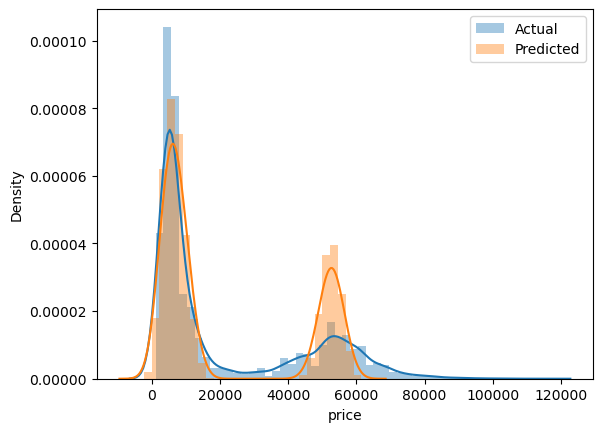

In [25]:
# Linear Regression Plotting the graph of actual and predicted price of flight

sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label="Predicted")
plt.legend()

# Decision Tree Regressor

In [26]:
# Mean absolute percentage error is 7.7 percent and RMSE is 3620 which is less than the linear regression model

X = df.drop(columns=["price"])
y = df['price']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print(f'r2 Score is : {r2_score(y_test,y_pred)}')
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print(f'MAE is : {mean_abs_error}')

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
print(f'MSE is : {mean_sq_error}')

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'RMSE is : {root_mean_sq_error}')

r2 Score is : 0.9748416229126257
MAE is : 1213.8158423703308
MSE is : 12968697.420302749
RMSE is : 3601.2077724428436


# Random Forest Regressor

In [28]:
# Mean absolute percentage error is 7.3 percent and RMSE is 2824 which is less than the linear regression and decision tree mode

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print(f'r2 Score is : {r2_score(y_test,y_pred)}')

mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
print(f'MAE is : {mean_abs_error}')

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error=metrics.mean_squared_error(y_test,y_pred)
print(f'MSE is : {mean_sq_error}')

root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f'RMSE is : {root_mean_sq_error}')

r2 Score is : 0.9845028090355351
MAE is : 1125.1914523201374
MSE is : 7988527.232293341
RMSE is : 2826.3982791343014
